# 使用CNN做圖形辨識

In [20]:
# 架構keras環境
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# 讀入mnist資料庫
from keras.datasets import mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [23]:
# 確認形狀
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (60000, 28, 28)
x_test: (10000, 28, 28)


In [24]:
# 輸入格式整理
# 用reshape整理形狀增加channel
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 確認
x_train[6000].shape

(28, 28, 1)

In [25]:
# 輸出格式整理
# np_utils改成one-hot encoding
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [26]:
# 打造CNN
# 決定神經網路架構、讀入相關套件
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [27]:
# 開啟空的模型
model = Sequential()

In [28]:
# 第一層
model.add(Conv2D(32,(3,3),padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 第二層
# filter個數要越來越多
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 第三層
model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 拉平
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))


In [29]:
# 組裝
model.compile(loss='mse',
             optimizer=SGD(lr=0.05),
             metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_5 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)        

In [31]:
# 訓練
model.fit(x_train, y_train, batch_size=100, epochs=12)

Epoch 1/12
600/600 [==============================] - 53s 88ms/step - loss: 0.1556 - accuracy: 0.1836
Epoch 2/12
600/600 [==============================] - 49s 81ms/step - loss: 0.0093 - accuracy: 0.9380
Epoch 3/12
600/600 [==============================] - 55s 92ms/step - loss: 0.0045 - accuracy: 0.9706
Epoch 4/12
600/600 [==============================] - 48s 81ms/step - loss: 0.0033 - accuracy: 0.9792
Epoch 5/12
600/600 [==============================] - 57s 95ms/step - loss: 0.0027 - accuracy: 0.9827
Epoch 6/12
600/600 [==============================] - 47s 79ms/step - loss: 0.0022 - accuracy: 0.9865
Epoch 7/12
600/600 [==============================] - 50s 84ms/step - loss: 0.0018 - accuracy: 0.9889
Epoch 8/12
600/600 [==============================] - 43s 71ms/step - loss: 0.0016 - accuracy: 0.9903
Epoch 9/12
600/600 [==============================] - 43s 72ms/step - loss: 0.0014 - accuracy: 0.9919
Epoch 10/12
600/600 [==============================] - 45s 76ms/step - loss: 0.001

In [32]:
# 檢視訓練成果
# loss和分數
score = model.evaluate(x_test, y_test)
print('loss:',score[0])
print('accuracy:',score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0019 - accuracy: 0.9878
loss: 0.0019253164064139128
accuracy: 0.9878000020980835


In [33]:
# 儲存
model.json = model.to_json()
open('handwriting_cnn_model.json','w').write(model.json)

# 儲存權重
model.save_weights('handwriting_cnn_weights.h5')

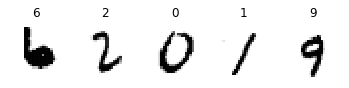

In [34]:
# 另一種方式檢視
predict = model.predict_classes(x_test)
# 隨機抽取序號比較訓練與測試資料
pick = np.random.randint(1, 9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')